In [1]:
import numpy as np
import pandas as pd


In [2]:
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("../input/hackerearths-reduce-marketing-waste/train.csv")
df2 = pd.read_csv("../input/hackerearths-reduce-marketing-waste/test.csv")

In [4]:
df.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,TitleM5DZY,"Davis, Perkins and Bishop Inc",Restaurants,320506$,2067263.7$,2020-03-29,Product_2,607.447.7883,50 - 100 Million,Category 2,...,Executive Vice President,charlenewerner@davis.com,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3,73.6
1,TitleKIW18,Bender PLC LLC,Construction Services,39488$,240876.8$,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,Category 4,...,Chairman/CEO/President,terrylogan@bender.com,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.9
2,TitleFXSDN,Carter-Henry and Sons,Hospitals/Clinics,359392$,2407926.4$,2019-07-27,Product_1,538.748.2271,500 Million - 1 Billion,Category 4,...,SVP/General Counsel,arielhamilton@carterhenry.com,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4,68.8
3,TitlePSK4Y,Garcia Ltd Ltd,Real Estate,76774$,468321.4$,2021-01-30,Product_2,(692)052-1389x75188,500 Million - 1 Billion,Category 3,...,CEO/Co-Founder/Chairman,erinwilson@garcia.com,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1,64.5
4,Title904GV,Lee and Sons PLC,Financial Services,483896$,NaN,2019-05-22,Product_2,001-878-814-6134x015,50 - 100 Million,Category 3,...,Executive Vice President,mr.christopher@lee.com,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4,62.4


In [5]:
df.shape

(7007, 23)

In [6]:
df.isnull().sum()

Deal_title                 0
Lead_name                  0
Industry                   1
Deal_value                51
Weighted_amount          525
Date_of_creation           0
Pitch                      0
Contact_no                 0
Lead_revenue               0
Fund_category              0
Geography                972
Location                  11
POC_name                   8
Designation                0
Lead_POC_email             0
Hiring_candidate_role      0
Lead_source                0
Level_of_meeting           0
Last_lead_update         633
Internal_POC               0
Resource                 149
Internal_rating            0
Success_probability        0
dtype: int64

In [7]:
df.dtypes

Deal_title                object
Lead_name                 object
Industry                  object
Deal_value                object
Weighted_amount           object
Date_of_creation          object
Pitch                     object
Contact_no                object
Lead_revenue              object
Fund_category             object
Geography                 object
Location                  object
POC_name                  object
Designation               object
Lead_POC_email            object
Hiring_candidate_role     object
Lead_source               object
Level_of_meeting          object
Last_lead_update          object
Internal_POC              object
Resource                  object
Internal_rating            int64
Success_probability      float64
dtype: object

In [8]:
df.describe()

,Internal_rating,Success_probability
count,7007.000000,7007.000000
mean,3.009562,64.745133
std,1.418666,17.931635
min,1.000000,-5.000000
25%,2.000000,60.600000
50%,3.000000,65.300000
75%,4.000000,69.600000
max,5.000000,107.340000


/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


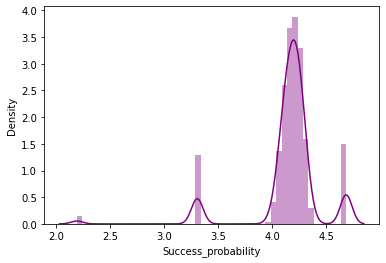

In [9]:
import seaborn as sb
from matplotlib import pyplot as plt
g=sb.distplot(np.log1p(df['Success_probability']),color="Purple")


In [10]:
df.nunique()

Deal_title               7007
Lead_name                7007
Industry                  171
Deal_value               6907
Weighted_amount          6480
Date_of_creation          777
Pitch                       2
Contact_no               7007
Lead_revenue                3
Fund_category               4
Geography                   2
Location                  597
POC_name                 5261
Designation                10
Lead_POC_email           7007
Hiring_candidate_role     639
Lead_source                 4
Level_of_meeting            3
Last_lead_update           11
Internal_POC               60
Resource                    6
Internal_rating             5
Success_probability       248
dtype: int64

In [11]:
df = df.drop(columns=['Lead_name', 'Contact_no','Lead_POC_email','POC_name','Date_of_creation'])
df2 = df2.drop(columns=['Lead_name', 'Contact_no','Lead_POC_email','POC_name','Date_of_creation'])

In [12]:
df.shape

(7007, 18)

In [13]:
df.head()

,Deal_title,Industry,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Geography,Location,Designation,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,TitleM5DZY,Restaurants,320506$,2067263.7$,Product_2,50 - 100 Million,Category 2,USA,"Killeen-Temple, TX",Executive Vice President,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3,73.6
1,TitleKIW18,Construction Services,39488$,240876.8$,Product_2,500 Million - 1 Billion,Category 4,India,Ratlam,Chairman/CEO/President,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.9
2,TitleFXSDN,Hospitals/Clinics,359392$,2407926.4$,Product_1,500 Million - 1 Billion,Category 4,USA,"Albany-Schenectady-Troy, NY",SVP/General Counsel,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4,68.8
3,TitlePSK4Y,Real Estate,76774$,468321.4$,Product_2,500 Million - 1 Billion,Category 3,USA,"Mount Vernon-Anacortes, WA",CEO/Co-Founder/Chairman,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1,64.5
4,Title904GV,Financial Services,483896$,NaN,Product_2,50 - 100 Million,Category 3,India,Shimoga,Executive Vice President,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4,62.4


In [14]:
df[df['Industry'].isnull()]

,Deal_title,Industry,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Geography,Location,Designation,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
4653,Title232C0,NaN,209418$,1266978.9$,Product_2,50 - 100 Million,Category 4,India,Pilibhit,SVP/General Counsel,Landscape architect,Contact Email,Level 1,2 days back,"Hameier,Kurt E",No,3,56.6


<AxesSubplot:>

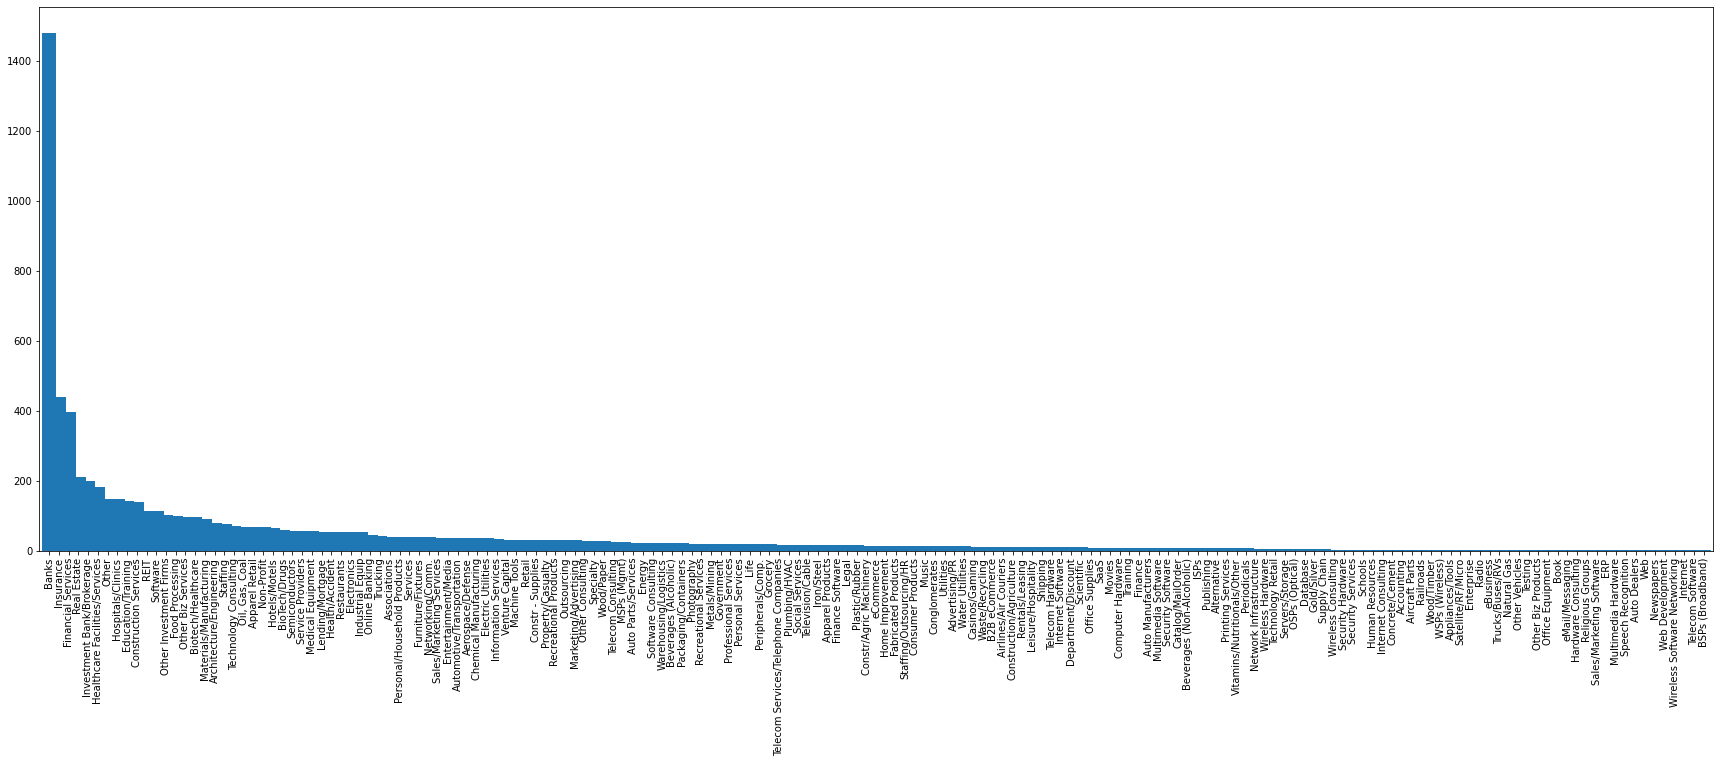

In [15]:
df["Industry"].value_counts().plot(kind='bar',width = 1.5,figsize = (30,10))

In [16]:
df['Industry'].fillna('Hotels/Motels', inplace = True)
df2['Industry'].fillna('Hotels/Motels', inplace = True)

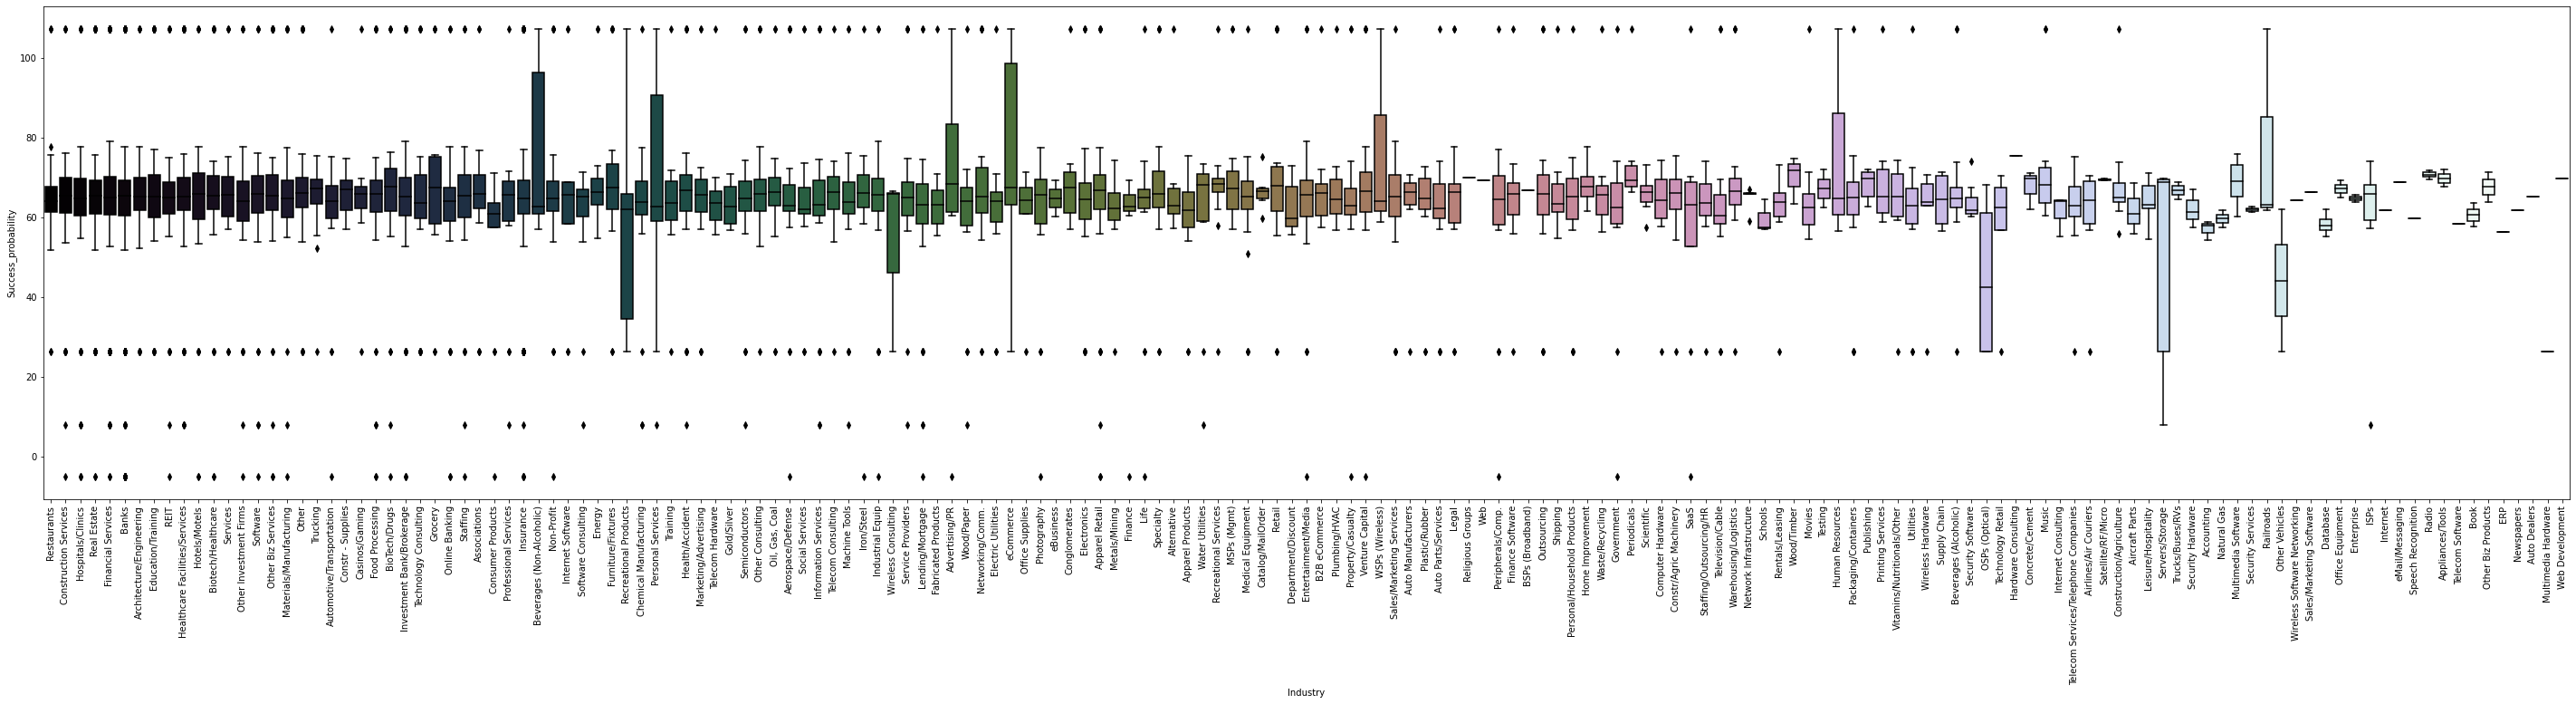

In [17]:
import seaborn as sb
plt.figure(figsize=(50, 10))
sb.boxplot(x="Industry", y="Success_probability", data=df,palette="cubehelix")
plt.xticks(rotation=90)
plt.show()

In [18]:
df['Deal_value'] = df['Deal_value'].str.replace('$', '')
df2['Deal_value'] = df2['Deal_value'].str.replace('$', '')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


In [19]:
df['Deal_value']

0       320506
1        39488
2       359392
3        76774
4       483896
         ...  
7002    192800
7003    220208
7004    253608
7005    118615
7006    258627
Name: Deal_value, Length: 7007, dtype: object

In [20]:
df["Deal_value"]= df["Deal_value"].fillna(0).astype(int)
df2["Deal_value"]= df2["Deal_value"].fillna(0).astype(int)

In [21]:
f = np.mean(df['Deal_value'])
f

247838.9200799201

In [22]:
f1 = np.mean(df2['Deal_value'])
f1

247459.56330625896

In [23]:
for i in range (0,len(df2)):
  if(df2['Deal_value'][i] == 0):
    df2['Deal_value'][i] = 247459

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
for i in range (0,len(df)):
  if(df['Deal_value'][i] == 0):
    df['Deal_value'][i] = 247839

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


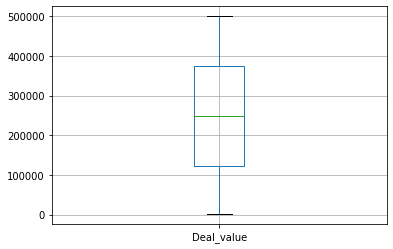

In [25]:
boxplot = df.boxplot(column=['Deal_value'])

<Figure size 3600x3600 with 0 Axes>

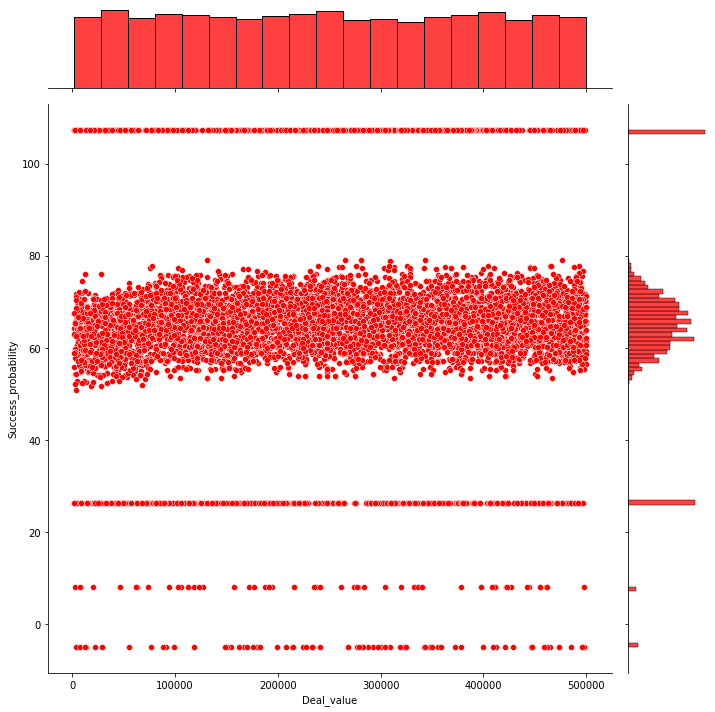

In [26]:
plt.figure(figsize=(50, 50))
sb.jointplot(x='Deal_value',y='Success_probability',data=df, color = 'red' , height =10, ratio = 6)
plt.show()

In [27]:
df['Weighted_amount']

0        2067263.7$
1         240876.8$
2        2407926.4$
3         468321.4$
4               NaN
           ...     
7002     1195360.0$
7003     1453372.8$
7004            NaN
7005      794720.5$
7006    1642281.45$
Name: Weighted_amount, Length: 7007, dtype: object

In [28]:
df['Weighted_amount'] = df['Weighted_amount'].str.replace('$', '')
df2['Weighted_amount'] = df2['Weighted_amount'].str.replace('$', '')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


In [29]:
df["Weighted_amount"]= df["Weighted_amount"].fillna(0).astype(float)
df2["Weighted_amount"]= df2["Weighted_amount"].fillna(0).astype(float)

In [30]:
g2 = np.mean(df2['Weighted_amount'])
g2

1512284.5661968465

In [31]:
g = np.mean(df['Weighted_amount'])
g

1452260.0168117594

In [32]:
for i in range (0,len(df2)):
  if(df2['Weighted_amount'][i] == 0):
    df2['Weighted_amount'][i] = 1512284.5

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
for i in range (0,len(df)):
  if(df['Weighted_amount'][i] == 0):
    df['Weighted_amount'][i] = 1452260.0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


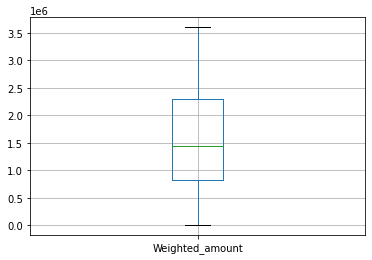

In [34]:
boxplot = df.boxplot(column=['Weighted_amount'])

<Figure size 3600x3600 with 0 Axes>

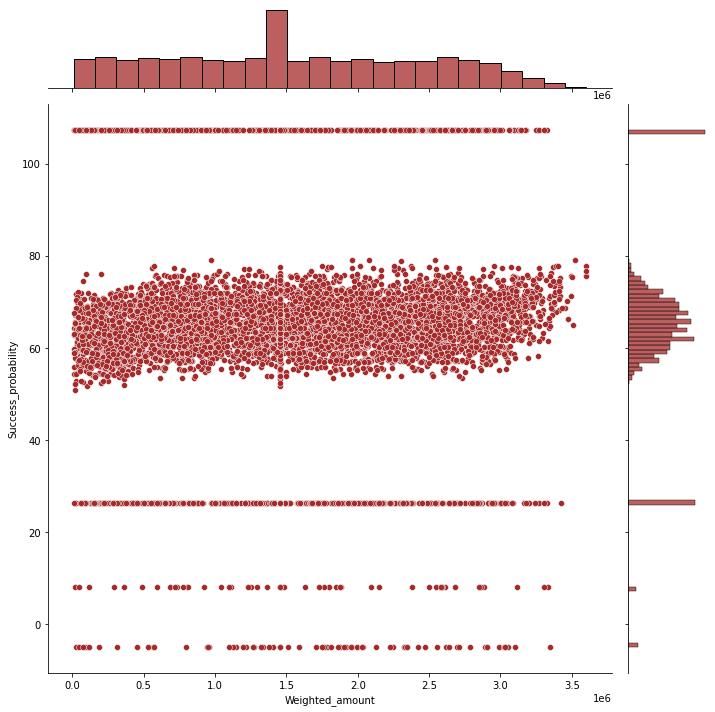

In [35]:
plt.figure(figsize=(50, 50))
sb.jointplot(x='Weighted_amount',y='Success_probability',data=df, color = 'brown' , height =10, ratio = 6)
plt.show()

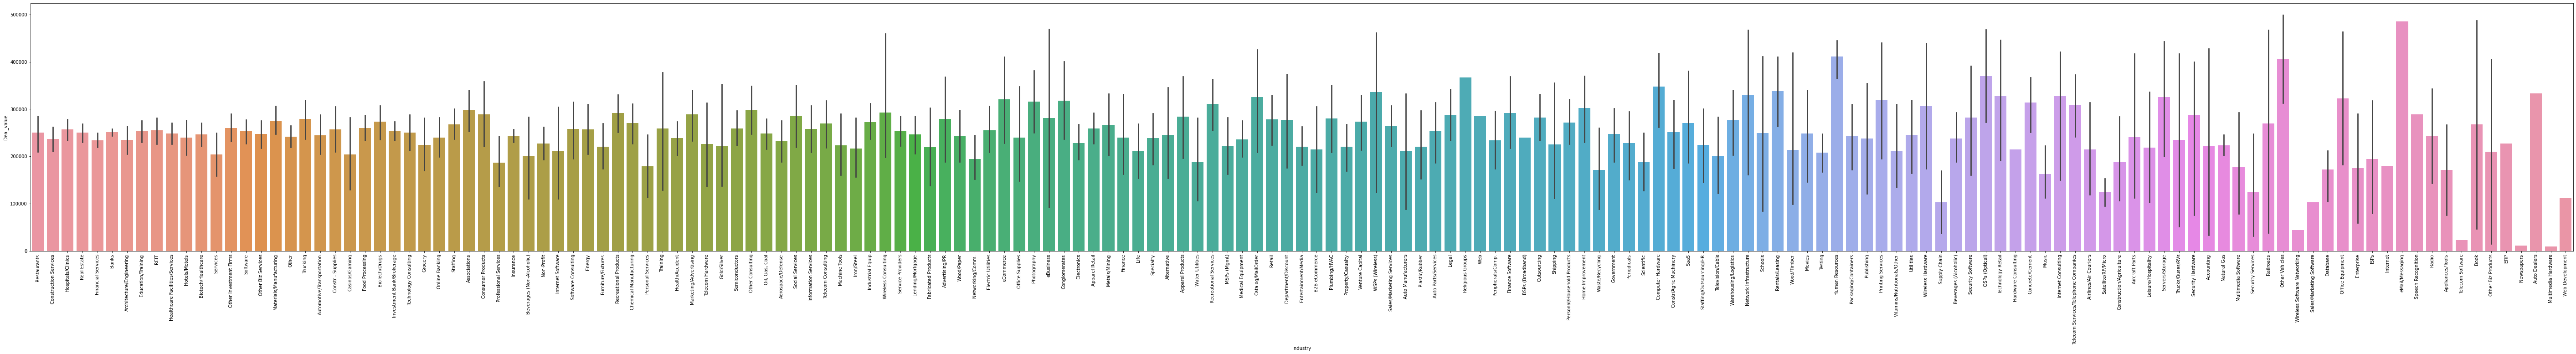

In [36]:
plt.figure(figsize=(100, 10))
sb.barplot(x="Industry", y="Deal_value", data=df)
plt.xticks(rotation=90)
plt.show()

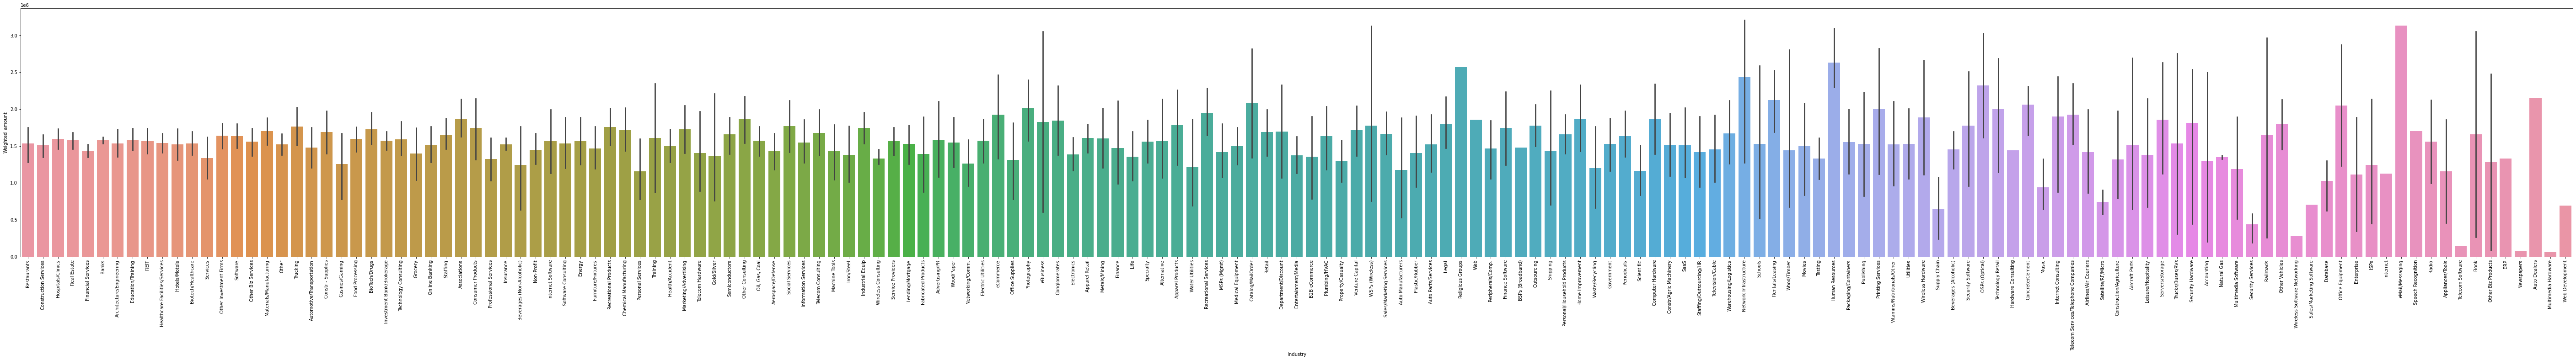

In [37]:
plt.figure(figsize=(100, 10))
sb.barplot(x="Industry", y="Weighted_amount", data=df)
plt.xticks(rotation=90)
plt.show()

In [38]:
df['Pitch'].unique()

array(['Product_2', 'Product_1'], dtype=object)

In [39]:
btype = df["Location"].str.split(",",n=1,expand = True)
df["City"]=btype[0]
df["State"]=btype[1]
    

In [40]:
btype2 = df2["Location"].str.split(",",n=1,expand = True)
df2["City"]=btype[0]
df2["State"]=btype[1]
    

In [41]:
df.head()

,Deal_title,Industry,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Geography,Location,Designation,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability,City,State
0,TitleM5DZY,Restaurants,320506,2067263.7,Product_2,50 - 100 Million,Category 2,USA,"Killeen-Temple, TX",Executive Vice President,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3,73.6,Killeen-Temple,TX
1,TitleKIW18,Construction Services,39488,240876.8,Product_2,500 Million - 1 Billion,Category 4,India,Ratlam,Chairman/CEO/President,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.9,Ratlam,None
2,TitleFXSDN,Hospitals/Clinics,359392,2407926.4,Product_1,500 Million - 1 Billion,Category 4,USA,"Albany-Schenectady-Troy, NY",SVP/General Counsel,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4,68.8,Albany-Schenectady-Troy,NY
3,TitlePSK4Y,Real Estate,76774,468321.4,Product_2,500 Million - 1 Billion,Category 3,USA,"Mount Vernon-Anacortes, WA",CEO/Co-Founder/Chairman,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1,64.5,Mount Vernon-Anacortes,WA
4,Title904GV,Financial Services,483896,1452260.0,Product_2,50 - 100 Million,Category 3,India,Shimoga,Executive Vice President,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4,62.4,Shimoga,None


In [42]:
for i in range(0,len(df)):
  if(df['State'][i] == None):
    df['Geography'][i] = "India"
  else:
    df['Geography'][i] = "USA"  


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
for i in range(0,len(df2)):
  if(df2['State'][i] == None):
    df2['Geography'][i] = "India"
  else:
    df2['Geography'][i] = "USA"  

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
df['Geography'].isnull().sum()

0

In [45]:
df2 = df2.drop(columns=['Location', 'City','State','Last_lead_update'])
df = df.drop(columns=['Location', 'City','State','Last_lead_update'])

In [46]:
df['Resource'].unique()

array([nan, 'No', 'We have all the requirements', 'Deliverable',
       'Cannot deliver', 'Not enough', 'Yes'], dtype=object)

In [47]:
df["Resource"].mode()

0    No
dtype: object

In [48]:
df['Resource'].fillna("No", inplace = True)
df2['Resource'].fillna("No", inplace = True)

In [49]:
df.columns

Index(['Deal_title', 'Industry', 'Deal_value', 'Weighted_amount', 'Pitch',
       'Lead_revenue', 'Fund_category', 'Geography', 'Designation',
       'Hiring_candidate_role', 'Lead_source', 'Level_of_meeting',
       'Internal_POC', 'Resource', 'Internal_rating', 'Success_probability'],
      dtype='object')

In [50]:
X = df[['Deal_title', 'Industry', 'Pitch','Lead_revenue', 'Fund_category', 'Geography', 'Designation','Hiring_candidate_role', 'Lead_source', 'Level_of_meeting','Internal_POC', 'Resource']]

In [51]:
X2 = df[['Deal_title', 'Industry', 'Pitch','Lead_revenue', 'Fund_category', 'Geography', 'Designation','Hiring_candidate_role', 'Lead_source', 'Level_of_meeting','Internal_POC', 'Resource']]

In [52]:
X2 = pd.get_dummies(data=X, drop_first=True)
X2.head()

,Deal_title_Title00IIZ,Deal_title_Title00VOR,Deal_title_Title013QQ,Deal_title_Title017NC,Deal_title_Title01ANN,Deal_title_Title01OGZ,Deal_title_Title01QOT,Deal_title_Title01QXQ,Deal_title_Title02VYQ,Deal_title_Title039A1,...,"Internal_POC_Turner,Marlon D","Internal_POC_Ullrich,Rose Anne","Internal_POC_Van Arter,Derrick","Internal_POC_Vickers Jr.,Henry J","Internal_POC_Young,Valerie K",Resource_Deliverable,Resource_No,Resource_Not enough,Resource_We have all the requirements,Resource_Yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [53]:
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,Deal_title_Title00IIZ,Deal_title_Title00VOR,Deal_title_Title013QQ,Deal_title_Title017NC,Deal_title_Title01ANN,Deal_title_Title01OGZ,Deal_title_Title01QOT,Deal_title_Title01QXQ,Deal_title_Title02VYQ,Deal_title_Title039A1,...,"Internal_POC_Turner,Marlon D","Internal_POC_Ullrich,Rose Anne","Internal_POC_Van Arter,Derrick","Internal_POC_Vickers Jr.,Henry J","Internal_POC_Young,Valerie K",Resource_Deliverable,Resource_No,Resource_Not enough,Resource_We have all the requirements,Resource_Yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [54]:
Y = df['Success_probability']

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
import warnings
warnings.filterwarnings("ignore")

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(4204, 7899)
(2803, 7899)
(4204,)
(2803,)


In [57]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [58]:
print(model.intercept_)

56.201104108876805


In [59]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Deal_title_Title00IIZ,2.542849
Deal_title_Title00VOR,7.708535
Deal_title_Title013QQ,0.052920
Deal_title_Title017NC,-3.780373
Deal_title_Title01ANN,-32.786732
...,...
Resource_Deliverable,-0.405697
Resource_No,-0.769784
Resource_Not enough,-0.627330
Resource_We have all the requirements,0.888844


In [60]:
predictions = model.predict(X_test)
predictions

array([59.94724989, 65.79656539, 67.27078376, ..., 69.27848269,
       62.26752522, 59.96627922])

In [61]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                             OLS Regression Results                            
Dep. Variable:     Success_probability   R-squared:                       1.000
Model:                             OLS   Adj. R-squared:                    nan
Method:                  Least Squares   F-statistic:                       nan
Date:                 Fri, 30 Apr 2021   Prob (F-statistic):                nan
Time:                         21:04:20   Log-Likelihood:             1.1792e+05
No. Observations:                 4204   AIC:                        -2.274e+05
Df Residuals:                        0   BIC:                        -2.008e+05
Df Model:                         4203                                         
Covariance Type:             nonrobust                                         
                                                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [62]:

Predict = model.predict(X2)

In [63]:
solution = pd.DataFrame(Predict)

In [64]:
id = df2['Deal_title']
sample_solution = pd.concat([id,solution],axis=1)
sample_solution.columns = ['Deal_title','Success_Probability']

In [65]:

sample_solution.to_csv('sample_solution.csv')

In [66]:

ss=pd.read_csv("sample_solution.csv")

In [67]:
ss.head()

,Unnamed: 0,Deal_title,Success_Probability
0,0,TitleAD16O,76.513528
1,1,TitleOW6CR,58.900000
2,2,TitleVVJQ5,68.800000
3,3,TitleUS8NA,64.500000
4,4,Title5VGWW,62.400000
